In [47]:
import pytesseract
import numpy as np
import cv2
import os

from pprint import pprint
from pytesseract import Output

pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'

In [79]:
img = cv2.imread('../images/1c5e5931-8337-40bb-9ff6-3718b941c902.JPG')

In [49]:
# Convert the BGR image to RGB format
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [50]:
os.environ['TESSDATA_PREFIX'] = '/usr/local/Cellar/tesseract/5.3.2/share/tessdata'
text = pytesseract.image_to_string(rgb, output_type=Output.DICT)
pprint(text)

{'text': 'BER F\n'
         'NUMERO bp rae Ss\n'
         'RUT 8120109,\n'
         'BOLETA ELECTRONICA NS Saettias\n'
         'SIT SANTIAGO ORE NO2o/4251\n'
         '\n'
         'CENCOSUD RETAIL S.A\n'
         '\n'
         'AV. KENNEDY 9001, LAS CONDES-saNtiaco\n'
         '\n'
         'AV. VITACURA 6258.5\n'
         '\n'
         'VITACURA ~ sANTIAG\n'
         '\n'
         '7441008154617 Hallet ss See cae)\n'
         '4 ETA COSTA DONU 1.165\n'
         '\n'
         '7a02219908020,s18S Grenins At\n'
         'ei 262 Gi AREG COSTA 629\n'
         '\n'
         '7802215502262 “cin tore rg 4.977\n'
         '\n'
         'NETO $ 3.922\n'
         '\n'
         'TOTAL IVA 19,00% ¢ 745\n'
         'Beer as $ 310\n'
         '\n'
         'i AL $ 4.667\n'
         '\n'
         'UBER EATS ¢ 4 ees\n'
         'VUELTO $ 0\n'
         '\n'
         'Timbre Electronico SII Res. 124 de 2009\n'
         'REIMPRESIONES EN www.santaisabel.cl\n'
         '\n'
         'Si\n'
         '\n'

# Scan using spanish trained data

In [51]:
!curl -o /usr/local/Cellar/tesseract/5.3.2/share/tessdata/spa.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/spa.traineddata

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13886  100 13886    0     0  29255      0 --:--:-- --:--:-- --:--:-- 29734


In [52]:
os.environ['TESSDATA_PREFIX'] = '/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata'
custom_config = r'--tessdata-dir "/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata"'
text = pytesseract.image_to_string(img, lang='spa', output_type=Output.DICT)
pprint(text)


{'text': 'BER F\n'
         'NUMERO" de Y s\n'
         'RUT 8120100,\n'
         'BOLETA ELECTRONICA NS 24 387ds\n'
         'SII SANTIAGO ORIENo¿9 1251\n'
         '\n'
         'CENCOSUD RETAIL S-A\n'
         '\n'
         'AV. KENNEDY 9001. LAS CONDES-SANTIAGO\n'
         '\n'
         'AY, VITACURA 6255.\n'
         '\n'
         'VITACURA - SANTIAS\n'
         '\n'
         '1441008154617 dallerO Tes STE\n'
         'A ETA COSTA DONU 1.163\n'
         '\n'
         'cen AS OEA 370\n'
         'ds 262 Gl AREG COSTA 629\n'
         '\n'
         '1802215502262 PUB TorAros 4.977\n'
         '\n'
         'NETO $ 3.922\n'
         '\n'
         'TOTAL IVA 19,00% $ 745\n'
         'eras $ 310\n'
         '\n'
         '4 AL $ 4.667\n'
         '\n'
         'UBER EATS $ Pla\n'
         'VUELTO $ 0\n'
         '\n'
         'Timbre Electronico SII Res, 124 de 2009\n'
         'REIMPRESIONES EN yww.santaisabel cl\n'
         '\n'
         'A O A\n'
         '\n'
         '0100270042463

# Page segmentation modes (PSM)

In [53]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [54]:
custom_config = r'--tessdata-dir "/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata" --psm 1'
text = pytesseract.image_to_string(img, lang='spa', config=custom_config, output_type=Output.DICT)
pprint(text)

{'text': 'BER F\n'
         'NUMERO" de Y s\n'
         'RUT 8120100,\n'
         'BOLETA ELECTRONICA NS 24 387ds\n'
         'SII SANTIAGO ORIENo¿9 1251\n'
         '\n'
         'CENCOSUD RETAIL S-A\n'
         '\n'
         'AV. KENNEDY 9001. LAS CONDES-SANTIAGO\n'
         '\n'
         'AY, VITACURA 6255.\n'
         '\n'
         'VITACURA - SANTIAS\n'
         '\n'
         '1441008154617 dallerO Tes STE\n'
         'A ETA COSTA DONU 1.163\n'
         '\n'
         'cen AS OEA 370\n'
         'ds 262 Gl AREG COSTA 629\n'
         '\n'
         '1802215502262 PUB TorAros 4.977\n'
         '\n'
         'NETO $ 3.922\n'
         '\n'
         'TOTAL IVA 19,00% $ 745\n'
         'eras $ 310\n'
         '\n'
         '4 AL $ 4.667\n'
         '\n'
         'UBER EATS $ Pla\n'
         'VUELTO $ 0\n'
         '\n'
         'Timbre Electronico SII Res, 124 de 2009\n'
         'REIMPRESIONES EN yww.santaisabel cl\n'
         '\n'
         'A O A\n'
         '\n'
         '0100270042463

# Page origientation

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 3.98
Script: Cyrillic
Script confidence: 0.63



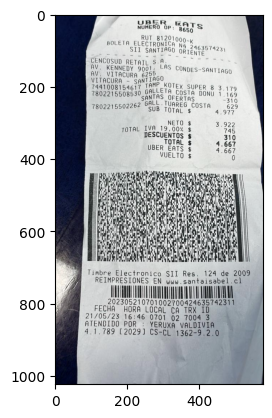

In [55]:
from PIL import Image
import matplotlib.pyplot as plt 

os.environ['TESSDATA_PREFIX'] = '/usr/local/Cellar/tesseract/5.3.2/share/tessdata'

plt.imshow(img)
osd = pytesseract.image_to_osd(img)
print(osd)

# Text selection

block_num = Current block number. When Tesseract performs the detections, it divides the image into several regions, which can vary according to the PSM parameters and also other criteria of the algorithm. Each block is a region

conf = prediction confidence (from 0 to 100. -1 means no text was recognized)

height = height of detected block of text (bounding box)

left = x coordinate where the bounding box starts

level = the level corresponds to the category of the detected block. There are 5 possible values:

page
block
paragraph
line
word
Therefore, if 5 is returned, it means that the detected block is text, if it was 4, it means that a line was detected

line_num = line number (starts from 0)

page_num = the index of the page where the item was detected

text = the recognition result

top = y-coordinate where the bounding box starts

width = width of the current detected text block

word_num = word number (index) within the current block

In [56]:
custom_config = '--tessdata-dir "/usr/local/Cellar/tesseract/5.3.2/share/tessdata"'

# image_to_data() function that detects characters and their position in the image
result = pytesseract.image_to_data(img, lang='eng', config=custom_config, output_type=Output.DICT)

# confidence score of text detection
print(result["conf"])
print(result["text"])

[-1, -1, -1, -1, 95, -1, 95, -1, 95, -1, 95, -1, 95, -1, -1, -1, 94, 0, -1, 16, 73, 0, 53, -1, 83, 83, -1, 91, 95, 70, 0, -1, 85, 87, 4, 0, 9, -1, -1, -1, 92, 90, 63, -1, -1, 84, 92, 88, 71, 20, -1, -1, 63, 79, 43, -1, -1, 70, 43, 38, -1, -1, 94, 9, 42, 7, 16, -1, 90, 90, 92, 65, -1, -1, 0, 14, 46, -1, 0, 95, 60, 92, 95, 96, -1, -1, 75, 21, 4, 4, 83, -1, -1, -1, 95, -1, 95, -1, -1, -1, 92, 65, 87, -1, -1, 89, 59, 59, 47, 84, -1, 0, 92, 95, -1, -1, 35, 87, 81, 89, -1, -1, 96, 90, 64, 30, 24, -1, 79, 85, 85, -1, -1, -1, 92, 91, 96, 81, 96, 96, 96, -1, 89, 93, 66, 71, -1, -1, -1, 34, -1, -1, -1, 91, -1, 90, 94, 95, 92, 91, 94, -1, 94, 94, 95, 95, 95, 95, -1, 90, 91, 85, 91, 92, -1, 0, 0, 84, 91, 91]
['', '', '', '', '    ', '', '      ', '', '        ', '', '  ', '', '   ', '', '', '', 'BER', ';', '', 'NUMERO!', 'bp', 'rae', 'Ss', '', 'RUT', '8120109,', '', 'BOLETA', 'ELECTRONICA', 'NS', 'Suede', '', 'SIT', 'SANTIAGO', 'ORE', 'No2o', '"4251', '', '', '', 'CENCOSUD', 'RETAIL', 'S.A', '', '

In [87]:
from PIL import ImageFont, ImageDraw, Image

def write_text(text, x, y, img, font, font_size = 32):
  font = ImageFont.truetype('arial.ttf', font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - font_size), text, font = font)
  img = np.array(img_pil)
  return img

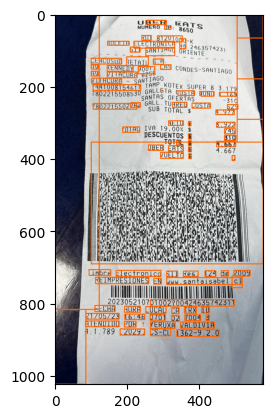

In [81]:
img_copy = img.copy()

def bouding_box(result, img, i, color=(255, 100, 0)):
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]
  
  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
  
  
  return x, y, img

for i in range(0, len(result['text'])):
  confidence = result['conf'][i]
  if confidence > 60:
    x, y, r_img = bouding_box(result, img_copy, i, (255, 100, 0))
    
plt.imshow(img_copy)
plt.show()
  

In [58]:
# Search using regular expressions

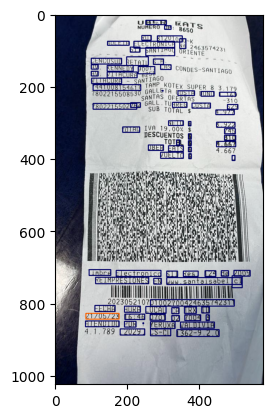

In [93]:
import re
# https://regexr.com/

#xx/xx/2023
date_pattern1 = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
#xx/xx/23
date_pattern2 = r"\b\d{2}/\d{2}/\d{2}\b"

img_copy = img.copy()

def bouding_box(result, img, i, color=(255, 100, 0)):
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]
  
  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
  
  
  return x, y, img

for i in range(0, len(result['text'])):
  confidence = result['conf'][i]
  if confidence > 60:
    text = result['text'][i]
    
    if re.match(date_pattern1, text) or re.match(date_pattern2, text):
      x, y, r_img = bouding_box(result, img_copy, i, (255, 100, 0))
      
    elif not text.isspace() and len(text) > 0:
      x, y, r_img = bouding_box(result, img_copy, i, (0, 0, 100))
  
plt.imshow(r_img)
plt.show()